<a href="https://colab.research.google.com/github/Tharun173/CSE22173-ML-LAB/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('/content/ML_lab3.xlsx')
group_data=data.groupby('LABEL').mean()
print(group_data)

                0           1          2            3          4    \
LABEL                                                                
3333   35021.971518   30.944450  39.454434  2397.193236  67.341696   
3334   38078.659501 -229.109162  64.151173  2651.788417 -39.908549   

               5           6          7           8           9    ...  \
LABEL                                                              ...   
3333   2574.141938  -16.861991  12.900568    6.350601  -42.267425  ...   
3334   2602.989470  510.506887  31.439506  299.883753  114.109798  ...   

             186         187        188         189         190        191  \
LABEL                                                                        
3333   77.963941  119.175760   9.275924  -88.057115    0.830644  42.055855   
3334   29.254359  168.075877 -72.153176 -193.608535 -332.733920  29.749377   

              192        193         194         195  
LABEL                                                 

In [3]:
print(group_data.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195],
      dtype='object', length=196)


In [4]:
grouped=data.std(axis=0)
print(grouped)

0        5917.164896
1         306.192224
2         275.838686
3         842.676925
4         136.697585
            ...     
192       408.681860
193       267.817979
194       321.787993
195       302.444708
LABEL       0.495640
Length: 197, dtype: float64


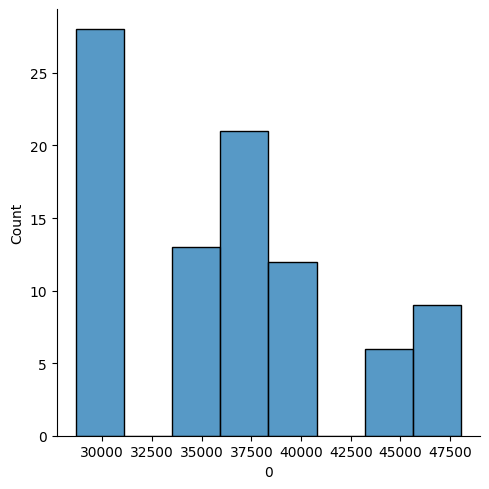

In [5]:
sns.displot(data[0])

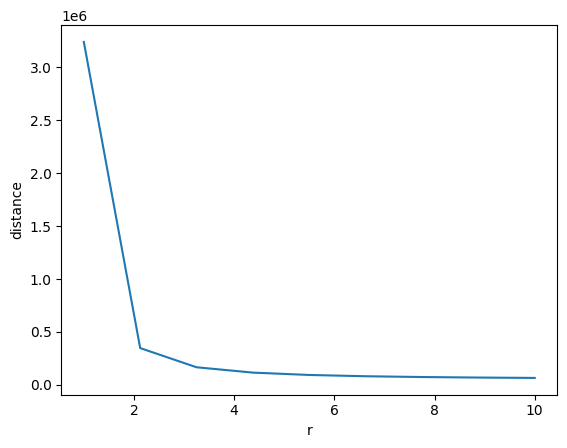

In [6]:
def mink_dist(p,q,r):
  return np.sum(np.abs(p-q)**r)**(1/r)

p=data[0]
q=data[1]
distances=[mink_dist(p,q,r) for r in range(1,10)]

x=np.linspace(1,10,9)
plt.plot(x,distances)
plt.xlabel('r')
plt.ylabel('distance')
plt.show()

In [7]:

from sklearn.model_selection import train_test_split


In [8]:
X=data.drop(columns=['LABEL'],axis=1)
Y=data['LABEL']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.score(X_test,Y_test)

1.0

In [11]:
knn.predict(X_test)

array([3333, 3333, 3334, 3333, 3333, 3333, 3334, 3333, 3334, 3334, 3334,
       3333, 3333, 3333, 3333, 3333, 3333, 3333, 3334, 3333, 3333, 3334,
       3333, 3334, 3334, 3333, 3334])

In [12]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.9629629629629629

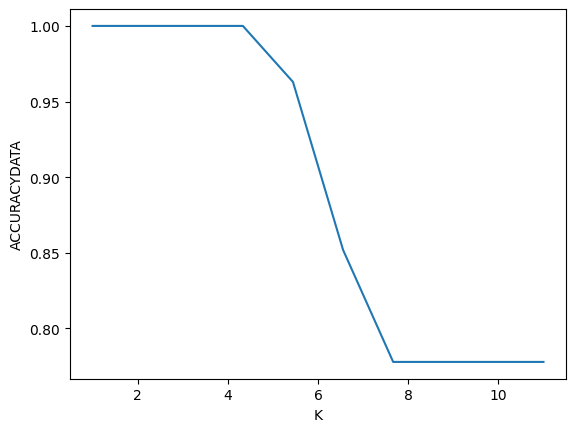

In [13]:
def accuaracy_data1(X_train,Y_train,X_test,Y_test,N):
  knn=KNeighborsClassifier(n_neighbors=N)
  knn.fit(X_train,Y_train)
  pred=knn.predict(X_test)
  return accuracy_score(pred,Y_test)

list_accuracy=[accuaracy_data1(X_train,Y_train,X_test,Y_test,N) for N in range(1,11)]
x=np.linspace(1,11,10)
plt.plot(x,list_accuracy)
plt.xlabel('K')
plt.ylabel('ACCURACYDATA')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,knn.predict(X_test))
print(cm)

[[16  1]
 [ 0 10]]


IT IS REGULAR FIT

In [15]:
print(classification_report(Y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

        3333       1.00      0.94      0.97        17
        3334       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

